Using KNN to predict whether or not a drafted player will reach the NHL level

In [7]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [8]:
# Load in data
df = pd.read_csv('data_sets/drafted_data.csv')
df.head()

,LEAGUE,PLAYER_ID,POSITION,SEASON,AGE_SEPT_15,GP,G,A,TP,PPG,...,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DY_STATUS,SHOOTS,DRAFTED,NHL_PPG,NHL_GP,NHL_DV
0,WHL,100577/richard-nejezchleb,F,2015,21.369444,49,20,31,51,1.040816,...,3,150,0,1,DY+3,L,Yes,0.000000,0,0
1,QMJHL,100867/jan-kostalek,D,2015,20.577778,57,7,36,43,0.754386,...,3,160,0,1,DY+2,R,Yes,0.000000,0,0
2,OHL,101221/dominik-kubalik,F,2014,19.066667,59,18,11,29,0.491525,...,2,126,0,0,DY+1,L,Yes,0.000000,0,0
3,WHL,10123/denis-rehak,D,2004,19.336111,25,0,3,3,0.120000,...,1,25,1,0,DY+1,L,Yes,0.000000,0,0
4,USHL,101430/nathan-walker,F,2013,19.605556,29,7,20,27,0.931034,...,1,29,1,0,DY+1,L,Yes,0.166667,12,1


In [9]:
# dropping non-numeric columns
df = df.drop(['LEAGUE','PLAYER_ID','POSITION','SEASON','DY_STATUS','SHOOTS','DRAFTED'], axis=1)
df.head()

,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,NHL_PPG,NHL_GP,NHL_DV
0,21.369444,49,20,31,51,1.040816,3,3,150,0,1,0.000000,0,0
1,20.577778,57,7,36,43,0.754386,3,3,160,0,1,0.000000,0,0
2,19.066667,59,18,11,29,0.491525,2,2,126,0,0,0.000000,0,0
3,19.336111,25,0,3,3,0.120000,1,1,25,1,0,0.000000,0,0
4,19.605556,29,7,20,27,0.931034,1,1,29,1,0,0.166667,12,1


In [10]:
# split into inputs and outputs
outcomes = df['NHL_DV']
outcomes.head()

input_factors = df.drop(['NHL_DV'], axis = 1)
input_factors.head()

,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,NHL_PPG,NHL_GP
0,21.369444,49,20,31,51,1.040816,3,3,150,0,1,0.000000,0
1,20.577778,57,7,36,43,0.754386,3,3,160,0,1,0.000000,0
2,19.066667,59,18,11,29,0.491525,2,2,126,0,0,0.000000,0
3,19.336111,25,0,3,3,0.120000,1,1,25,1,0,0.000000,0
4,19.605556,29,7,20,27,0.931034,1,1,29,1,0,0.166667,12


In [11]:
# Train/test Split
input_train, input_test, output_train, output_test = train_test_split(input_factors, outcomes, random_state=42, 
                                                                      stratify=outcomes)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

input_scaler = StandardScaler().fit(input_train.values.reshape(-1, 1))

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

input_train_scaled = input_scaler.transform(input_train)
input_test_scaled = input_scaler.transform(input_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


k: 1, Train/Test Score: 1.000/0.882
k: 3, Train/Test Score: 0.945/0.910
k: 5, Train/Test Score: 0.929/0.913
k: 7, Train/Test Score: 0.921/0.906
k: 9, Train/Test Score: 0.916/0.900
k: 11, Train/Test Score: 0.915/0.902
k: 13, Train/Test Score: 0.910/0.900
k: 15, Train/Test Score: 0.908/0.899
k: 17, Train/Test Score: 0.904/0.900
k: 19, Train/Test Score: 0.902/0.896
k: 21, Train/Test Score: 0.901/0.895
k: 23, Train/Test Score: 0.900/0.893


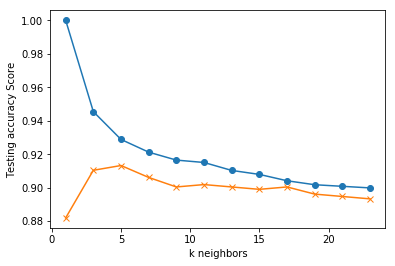

In [17]:

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(input_train_scaled, output_train)
    train_score = knn.score(input_train_scaled, output_train)
    test_score = knn.score(input_test_scaled, output_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 25, 2), train_scores, marker='o')
plt.plot(range(1, 25, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# Note that k: 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(input_train, output_train)
print('k=17 Test Acc: %.3f' % knn.score(input_test, output_test))

k=11 Test Acc: 0.900


This is a massive improvments over using decision trees to predict whether or not a drafted player makes it to the NHL. Using Random Forest Classifiers with Decision Trees we we're able to predict with only 70.75% accuracy, where as here we reached 90%! I'm very happy with this outcome but still eager to test other methods, including Neural networks and logistic regression to see if we can improve further.